# Import of Libraries 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn import metrics
import pandas as pd
from ggplot import *

C:\Users\vanderstraatenj\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# data set first overview 

In [2]:
#import of the data set
data = pd.read_csv("C:\\Users\\vanderstraatenj\\Desktop\\Data science\\Thesis\\Code py\\Data_set_exploration_dissertation.csv",encoding = 'ISO-8859-1').round(decimals=2)
data.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,"Still active (Yes = 1, No = 0)"
0,6,4,6,4,0.46,0.0,63.60,40.0,3.0,18.00,0.12,0.70,1
1,14,10,2,4,1.22,11.2,26.60,29.8,2.8,9.60,0.28,0.94,1
2,82,42,2,10,0.36,1.2,25.26,23.6,4.0,12.24,1.62,5.06,0


## Splif of the data set

In [3]:
#Splitting data set into X (independent) and Y (dependent) values
X = data.iloc[:,0:14]
Y = data.iloc[:,-1]


# Exploration

## First overview of the data set

In [4]:
X.iloc[:,[0,1,2,3,4,5,6,7,8,9,11]].describe().round(decimals=2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X12
count,916.00,916.00,916.00,916.00,916.00,916.00,916.00,916.00,916.00,916.00,916.00
mean,25.42,10.66,7.06,5.30,0.93,1.46,26.83,31.00,3.53,14.94,3.73
std,55.65,12.94,7.26,4.18,0.72,4.05,16.55,25.30,2.17,10.74,7.40
min,2.00,2.00,2.00,2.00,-0.30,0.00,0.00,0.00,2.00,2.00,0.10
25%,4.00,4.00,2.00,2.00,0.46,0.00,15.24,12.00,2.00,8.00,0.66
50%,8.00,6.00,4.00,4.00,1.12,0.00,26.60,27.80,2.80,12.00,1.28
75%,20.00,12.00,8.00,6.00,1.32,1.00,36.46,44.85,4.00,17.04,3.04
max,602.00,82.00,56.00,22.00,1.98,41.00,96.00,144.40,16.00,102.56,75.18


## Breakdown of the variable by churner / non Churner

In [5]:
X.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].groupby('Still active (Yes = 1, No = 0)').mean().round(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
"Still active (Yes = 1, No = 0)",,,,,,,,,,,,
0,12.24,6.4,5.94,4.31,0.77,1.91,25.39,28.66,3.24,13.42,0.42,1.76
1,46.25,17.4,8.83,6.87,1.18,0.76,29.12,34.70,4.00,17.33,1.56,6.83


## Correlation between variables

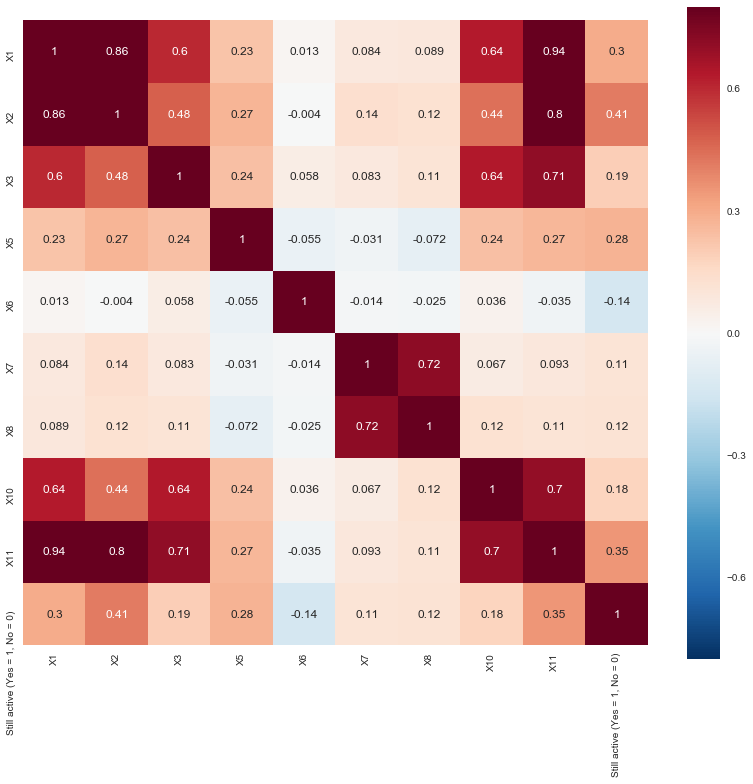

In [6]:
heat_map = data.iloc[:,[0,1,2,4,5,6,7,9,10,12]]

plt.figure(figsize=(14,12))
sns.heatmap(heat_map.corr(), vmax=0.8, square=True, annot=True)
plt.show()

## Variables distribution 

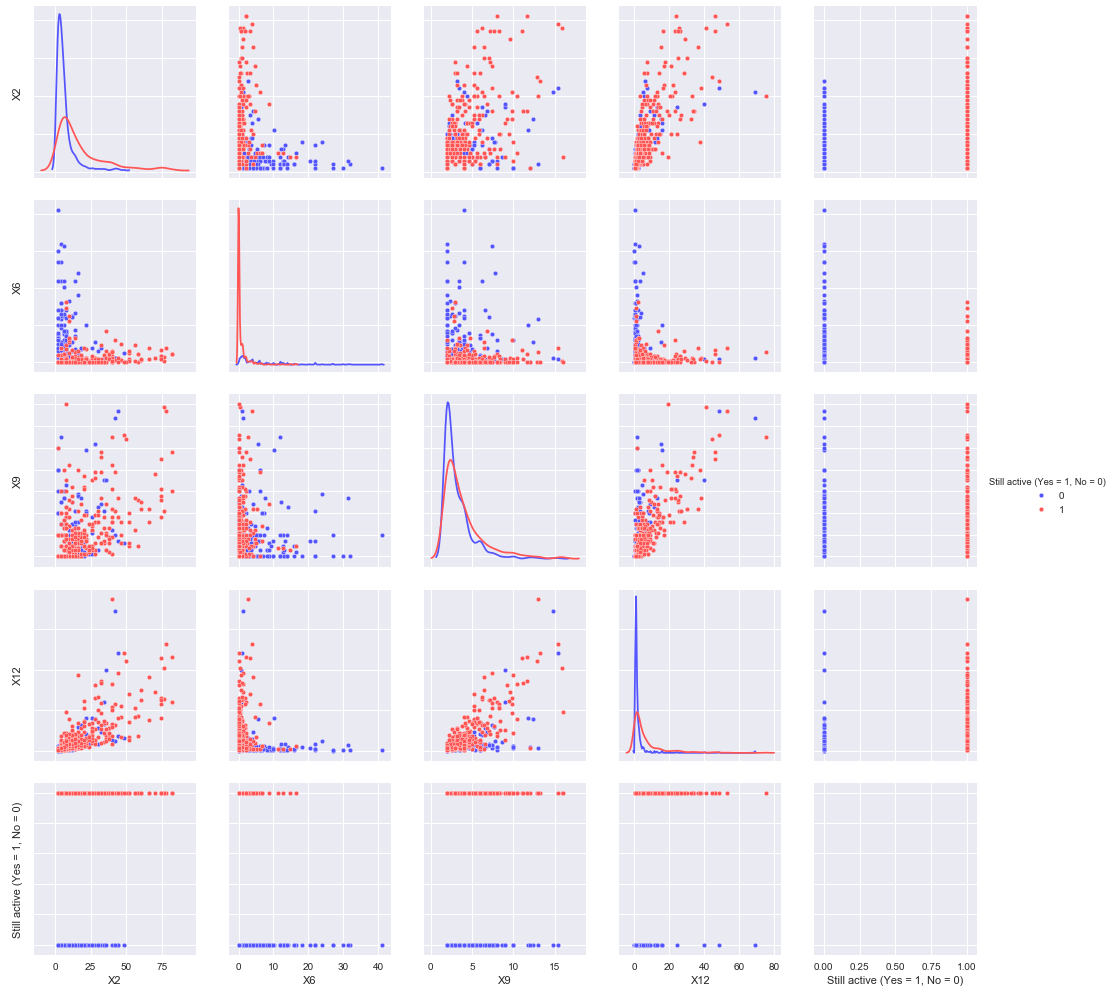

In [7]:
heat_map_2 = data.iloc[:,[1,5,8,11,12]]

g = sns.pairplot(data=heat_map_2, size=2.8,palette = 'seismic',diag_kind = 'kde',plot_kws=dict(s=20),hue = 'Still active (Yes = 1, No = 0)')
g.set(yticklabels=[])
plt.show()

# Models

## Preprocessing: split of data into training and test set

In [8]:
#Splitting data set into X (independent) and Y (dependent) values
X = data.iloc[:,0:14]
Y = data.iloc[:,-1]

#Splitting X and Y set in training & test set
X_train, X_test, Y_train, Y_test = train_test_split(X.iloc[:,[0,1,4,5,10]],Y,test_size =0.2,random_state = 1)

#Converting Y value to categorical variable in order to use regression with SK learn
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_train)
encoded = lab_enc.fit_transform(Y_test)

#extracting the name of the columns variables
dic1 = [0,1,2,3,4,5,6,7,8]
dic2= X_train.columns.tolist()

## Feature scaling - normalisation of the data

In [9]:
Sc_X = StandardScaler()
Sc_Y = StandardScaler()

X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

## Logistic regression

confusion matrix       
score = 0.788043478261


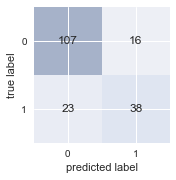

In [10]:
# Creation of regressor
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

#predicting the test result
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('confusion matrix       ')
fig, ax = plot_confusion_matrix(conf_mat=cm)

score = classifier.score(X_test, Y_test)
print('score =', score)


plt.show()

### Analysis of the regression & elimination of non sginificant variables

In [11]:
import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = Y_train,exog = X_train).fit()
regressor_OLS.summary(xname=['X1','X2','X5','X6','X11'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Still active (Yes = 1, No = 0)   R-squared:                       0.158
Model:                                        OLS   Adj. R-squared:                  0.153
Method:                             Least Squares   F-statistic:                     27.36
Date:                            Mon, 28 Aug 2017   Prob (F-statistic):           2.03e-25
Time:                                    11:42:05   Log-Likelihood:                -641.69
No. Observations:                             732   AIC:                             1293.
Df Residuals:                                 727   BIC:                             1316.
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -0.3443      0.071     -4.872      0.000      -0.483      -0.206
X2             0.2643      0.040      6.652      0.000       0.186       0.342
X5             0.0818      0.023      3.623      0.000       0.037       0.126
X6            -0.0503      0.022     -2.308      0.021      -0.093      -0.008
X11            0.2563      0.063      4.086      0.000       0.133       0.379
==============================================================================
Omnibus:                      193.791   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.154
Skew:                           0.527   Prob(JB):                     7.11e-15
Kurtosis:                       1.987   Cond. No.                         7.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Random forest

### Creation of the model

score = 0.820652173913
confusion matrix       


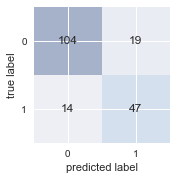

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier_random_forest = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 1)
classifier_random_forest.fit(X_train,Y_train)
Y_pred_forest = classifier_random_forest.predict(X_test)

score = classifier_random_forest.score(X_test, Y_test)
print('score =', score)

Y_pred_binary =[]

for i in Y_pred_forest:
    if i >= 0.5:
        outcome = 1
    else:
        outcome = 0
    Y_pred_binary.append(outcome)

#Making confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_binary)
print('confusion matrix       ')
fig, ax = plot_confusion_matrix(conf_mat=cm)

plt.show()

### Feature ranking

Feature ranking:
1. X11 (0.368186)
2. X1 (0.184059)
3. X5 (0.182508)
4. X2 (0.161419)
5. X6 (0.103827)


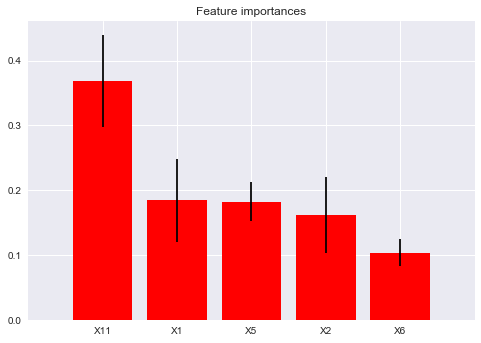

In [13]:
from sklearn.datasets import make_classification

# Build a classification task using 5 informative features
X, y = make_classification(n_samples=1000,
                           n_features=5,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=True)

# compute the feature importances

importances = classifier_random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier_random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#dictionary variables (dic1 & dic 2 see above)

variables_dictionary = dict(zip(dic1,dic2))

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, variables_dictionary[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ['X11','X1','X5','X2','X6'])
plt.xlim([-1, X.shape[1]])
plt.show()


## ROC curve & AUC

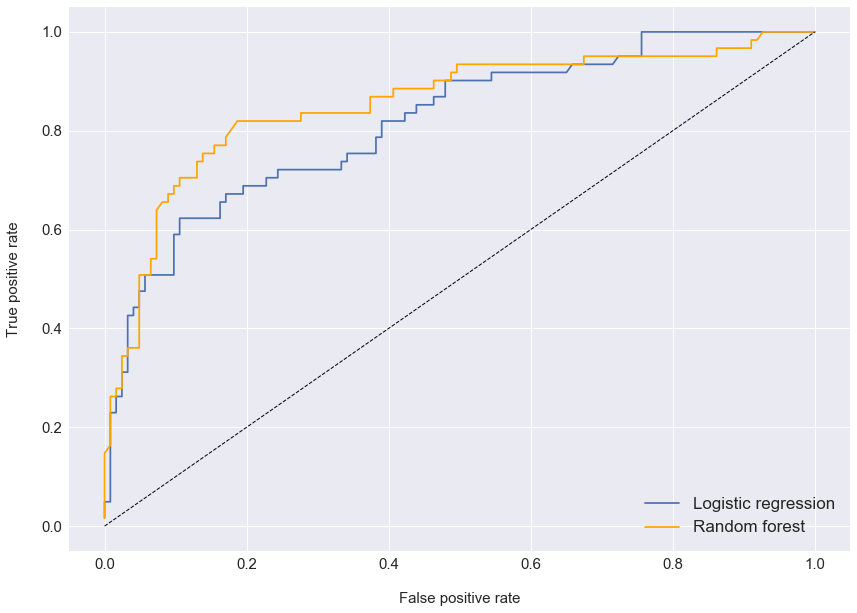

AUC
0.81594029055
0.853991736639


In [14]:
#Computing the values of the roc curve
preds = classifier.predict_proba(X_test)[:,1]
fpr_0, tpr_0, _ = metrics.roc_curve(Y_test, preds)
preds = classifier_random_forest.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

#plotting the graph
plt.figure(figsize = (14,10))
logistic_regression_roc = plt.plot(fpr_0,tpr_0, label='Logistic regression')
random_forest_roc = plt.plot(fpr,tpr,label='Random forest', c='orange')
plt.plot([0,1],[0,1],c='black', ls='--',linewidth =1)
plt.legend(loc=4,fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False positive rate', fontsize=15,labelpad=20)
plt.ylabel('True positive rate', fontsize=15, labelpad=20)
plt.show()

#Computing the value of AUC
auc_logistic = np.trapz(tpr_0,fpr_0)
auc_random = np.trapz(tpr,fpr)

print('AUC')
print(auc_logistic)
print(auc_random)

